# A deep learning approach to observe the behaviour of employees towards punctuality at work

In this project we will implement three different classification algorithms from scratch. i.e. we implement all the mathematics invovled in these algorithms.  
    - Logistic Regression
    - Neural Network (One hidden layer)
    - Deep Learning Neural Network (At least two hidden layers)
   
At the end of the project, we compare the performance of three different models and will use different optimization techniques to further improve the performance. 

We will also implement the Deep Learning Neural Network in Tensorflow, as Tensorflow is one of the most widely used deep learning framework. 

We will also use these models implemented in library sklearn and compare the performance of our implementation from scratch to these buildin functions. 

After the implementation of algorithms along with different optimization techniques, we will further analyze our data and will understand different features and see what are the most important features that is effecting employees to have excessive number of hours absent from work and how we can build a model to reduce its impact. 


## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [data_utils] has different functions to load data, analyze data and different other visualization functions. 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import sklearn
import sklearn.linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from data_utils import *

## 2 - Analysis of Dataset ##

Let's get more familiar with the dataset. 

We will load 60% data to train, 20% data to dev/validation and 20% data to test. In the implementation dev and validation are used interchangeably and both mean the same set. We also bring the matrix into the order to be processed by our algorithm. For example in the original data, we have all features in different columns and the last column is the result. In the rearrangement we bring all the features to a single column, so that we have all the features of the first training example in the first column, all the features of the second training example in the seond column and so on. The result is stored in a horizantal vector, where each column represent the result of the training samples.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that we substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. Let's standardize our dataset.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, n_features, ...)
- Reshape the datasets such that each example is now a vector of size (n_features, 1)
- We place all vectora of examples and stack them vertical into a single matrix
- "Standardize" the data
</font>

In [69]:
file = 'dataset/Absenteeism_at_work.csv'

# Load the dataset as DataFrame in Pandas and then convert to matrix
#data = load_dataset(file)
df = pd.read_csv(file)
print('Shape of dataset is:{}'.format(df.shape))
print('Type of features is:\n{}'.format(df.dtypes))

Shape of dataset is:(740, 22)
Type of features is:
ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
Absenteeism category                 int64
dty

our data is not balanced. To bring it into balanced, we should use SMOTE


In [70]:
from imblearn.over_sampling import SMOTE

X = np.array(df.loc[:, df.columns != 'Absenteeism category'])
y = np.array(df.loc[:, df.columns == 'Absenteeism category'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))


sm = SMOTE(random_state=2)
X, y = sm.fit_sample(X, y.ravel())
y = y.reshape(y.shape[0],1)

print('After OverSampling, the shape of X: {}'.format(X.shape))
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

data = np.concatenate([X, y], axis=1)
print("Size of the whole data after over sampling", data.shape)
#print(data)
#df1 = pd.DataFrame(data)
#df1.to_csv("smote.csv")

Shape of X: (740, 21)
Shape of y: (740, 1)
Before OverSampling, counts of label '1': [272]
Before OverSampling, counts of label '0': [468] 

After OverSampling, the shape of X: (936, 21)
After OverSampling, the shape of y: (936, 1) 

After OverSampling, counts of label '1': [468]
After OverSampling, counts of label '0': [468]
Size of the whole data after over sampling (936, 22)


In [71]:
# Randomly distribute data into training, testing and validation classes. We use 60-20-20 distribution
un_training_x, training_y, un_testing_x, testing_y, un_validation_x, validation_y = split_random(data, percent_train=60, percent_test=20)

# Lets normalize our X data
training_x, testing_x, validation_x = normalize_data(un_training_x, un_testing_x, un_validation_x)

# We can print the X data, to be sure that we have the normalized data in the range of -1 to 1
print("X:")
print_normalized_data(training_x, testing_x, validation_x)
print("__________________________________")


# Lets print the Y class, to be sure that we have a mix of positive and negative class
print("Y")
print_normalized_data(training_y, testing_y, validation_y)
print("__________________________________")

percent_train 60
percent_test 20
percent_validation 20
Number of training examples: m_train = 561
Number of testing examples: m_test = 187
Number of validation examples: m_validation = 188
Number of features: n_features = 21
training_x shape (21, 561)
training_y shape (1, 561)
testing_x shape (21, 187)
testing_y shape (1, 187)
validation_x shape (21, 188)
validation_y shape (1, 188)
Original Data:
[[34. 28.  5. ... 28.  1.  0.]
 [34. 27.  1. ... 28.  2.  0.]
 [11. 24.  8. ... 30.  8.  1.]
 ...
 [ 3.  6. 11. ... 31.  8.  1.]
 [ 3. 27.  3. ... 31.  3.  0.]
 [20. 28.  3. ... 23.  4.  0.]]
____________________________________________________________
X:
Training:

[[0.00343815 0.00343815 0.00111234 ... 0.00097022 0.00010112 0.00242693]
 [0.00266097 0.00256593 0.00228083 ... 0.00224218 0.00209076 0.00085531]
 [0.0013746  0.00027492 0.00219936 ... 0.00192444 0.00192444 0.00247428]
 ...
 [0.0017811  0.0017811  0.0017811  ... 0.00174745 0.0017811  0.00176039]
 [0.00187218 0.00187218 0.00200591 

## 3 - Logistic Regression ##


In this part of the project we implement logistic regression algorithm to predict the two categories in our dataset. At the end of this implementation we compare the performance of our detailed implementation to the performance of libray functions of logistic regression. This will serve as a base line to compare our performance with NN and DL and also see how different optimization techniques further improves the performance. 

It's time to design a simple algorithm to distinguish between the two classes in the dataset.

We first build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In Logistic Regression, we carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude
    
### 3.1 - Building the parts of our algorithm ###

The main steps for building a a Logistic Regression in the mindset of Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    
The whole model can be explained in the diagram given below. 
<img src="images/image1.png" style="width:650px;height:400px;">

We normally build 1-3 separately and integrate them into one function we call `model()`.

#### 3.1.1 - Helper functions

Implement `sigmoid()`. As we've seen in the figure above, we need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

#### 3.1.2 - Initializing parameters

Implement parameter initialization for Logistic Regression. We have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation. As an optimization step, we can use Xavier initializer, or He initializer to improve the learning process. 

#### 3.1.3 - Forward and Backward propagation

Now that our parameters are initialized, we can do the "forward" and "backward" propagation steps for learning the parameters.

**Task:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using in back propagation: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

### 3.2 Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

### 3.3 Predict labels
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of $A$ into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

    
The prediction process can be explained in the diagram given below. 
<img src="images/image2.png" style="width:650px;height:400px;">

<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples
</font>

### 3.4 - Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Task:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()


In [72]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    negative = [-x for x in z]
    s = 1.0 / (1 + np.exp(negative))
    
    return s

# In logistic Regression we can initialize from zero
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)                                     # compute activation
    cost = (-1/m)*(np.dot(Y,np.log(A).T) + np.dot((1 - Y),np.log(1 - A).T))                         # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)*np.dot(X,(A - Y).T)
    db = (1/m)*np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def GradientDescent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - dw*learning_rate
        b = b - db*learning_rate
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def lr_predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)  
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

def compute_accuracy(predY, Y):
    return (100 - np.mean(np.abs(predY - Y)) * 100)
    
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = np.zeros((X_train.shape[0],1)),0

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = GradientDescent(w,b,X_train,Y_train,num_iterations,learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = lr_predict(w,b,X_train)
    Y_prediction_test = lr_predict(w,b,X_test)

    # Print train/test Errors
    print("train accuracy: ", compute_accuracy(Y_prediction_train, Y_train))
    print("test accuracy: ", compute_accuracy(Y_prediction_test, Y_test))
    
    d = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_test" : Y_prediction_test, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [73]:
d = model(training_x, training_y, testing_x, testing_y, num_iterations = 10000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.692867
Cost after iteration 2000: 0.692852
Cost after iteration 3000: 0.692839
Cost after iteration 4000: 0.692826
Cost after iteration 5000: 0.692812
Cost after iteration 6000: 0.692799
Cost after iteration 7000: 0.692786
Cost after iteration 8000: 0.692773
Cost after iteration 9000: 0.692759
train accuracy:  51.15864527629233
test accuracy:  47.05882352941176


**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

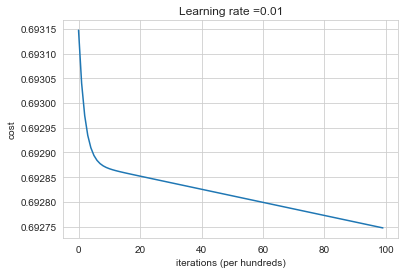

In [74]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 3.5 - Further analysis of learning rate

We built our first classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques (e.g. regularization) to reduce overfitting. 

Once, we know an optimized learning rate, we can traing our model again on the selected learning rate and recompute our test/dev set accuracy.

learning rate is: 8.0
train accuracy:  65.41889483065953
test accuracy:  60.962566844919785

-------------------------------------------------------

learning rate is: 2
train accuracy:  55.258467023172905
test accuracy:  50.80213903743315

-------------------------------------------------------

learning rate is: 1
train accuracy:  55.258467023172905
test accuracy:  50.80213903743315

-------------------------------------------------------

learning rate is: 0.1
train accuracy:  51.15864527629233
test accuracy:  50.80213903743315

-------------------------------------------------------

learning rate is: 0.01
train accuracy:  51.15864527629233
test accuracy:  47.05882352941176

-------------------------------------------------------

learning rate is: 0.001
train accuracy:  51.15864527629233
test accuracy:  47.05882352941176

-------------------------------------------------------



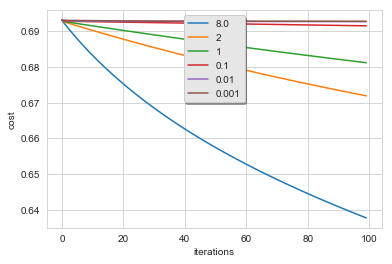

In [75]:
learning_rates = [8.0, 2, 1, 0.1, 0.01, 0.001] # Over shoot after 8.0
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(training_x, training_y, testing_x, testing_y, num_iterations = 10000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

train accuracy:  86.98752228163993
test accuracy:  80.74866310160428


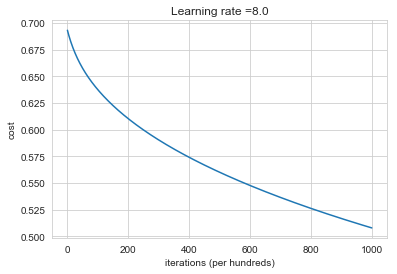

In [76]:
d = model(training_x, training_y, testing_x, testing_y, num_iterations = 100000, learning_rate = 8.0, print_cost = False)

# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [77]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [78]:
# Lets perform prediction on train, test and dev sets

# Retrieve parameters w and b from dictionary "d"
w = d["w"]
b = d["b"]
    
# Predict test/train/dev set examples 
Y_prediction_train = lr_predict(w,b,training_x)
Y_prediction_dev = lr_predict(w,b,validation_x)
Y_prediction_test = lr_predict(w,b,testing_x)


# Print train/test/dev Errors
acc_train = compute_accuracy(Y_prediction_train, training_y)
acc_dev = compute_accuracy(Y_prediction_dev, validation_y)
acc_test = compute_accuracy(Y_prediction_test, testing_y)

acc_dic = {}

acc_data = []
acc_data.append([acc_train, acc_dev, acc_test])
acc_dic['lr_scratch'] = acc_data

print("Train accuracy: ", acc_train)
print("Dev accuracy: ", acc_dev)
print("Test accuracy: ", acc_test)

#print(Y_prediction_test)
#print(testing_y)
#print(Y_prediction_train)
#print(training_y)


Train accuracy:  86.98752228163993
Dev accuracy:  77.12765957446808
Test accuracy:  80.74866310160428


Confusion matrix of Testing Data:
[[64 35]
 [ 1 87]]


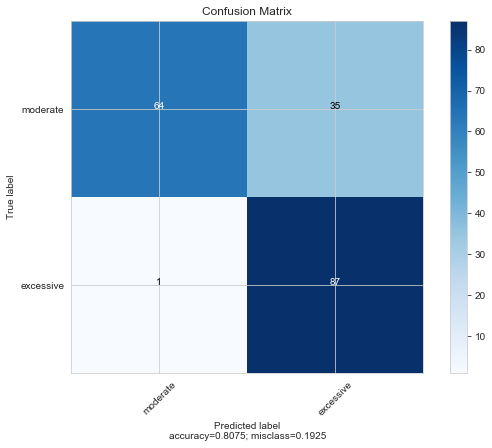

In [79]:
from sklearn.metrics import confusion_matrix

#print(Y_prediction_test.ravel())
#print(testing_y.ravel())
cmatrix = confusion_matrix(testing_y.ravel(), Y_prediction_test.ravel())
print("Confusion matrix of Testing Data:")
print(cmatrix)
plot_confusion_matrix(cmatrix,
    normalize    = False,
    target_names = ['moderate', 'excessive'],
    title        = "Confusion Matrix")

# [[X1 X2][Y1 Y2]] X1 + Y2 Correct Prediction, X2 + Y1 Incorrect Prediction 


In [80]:

print("Classification Report:")
print(classification_report(testing_y, Y_prediction_test))

metrics.f1_score(testing_y, Y_prediction_test, average='weighted', labels=np.unique(Y_prediction_test))

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       1.00      1.00      1.00         1
         10       0.00      0.00      0.00         0
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.9886363636363636

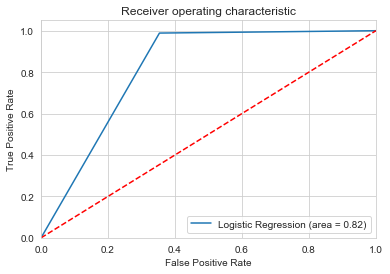

In [81]:
logit_roc_auc = roc_auc_score(testing_y.ravel(), Y_prediction_test.ravel())
fpr, tpr, thresholds = roc_curve(testing_y.ravel(), Y_prediction_test.ravel())
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 3.6 - Compare the performance of our implementation with $sklearn$ library code

We would like to compare our performance with the library code that is already implemented in sklearn. 

In [82]:
clf = sklearn.linear_model.LogisticRegressionCV();
print(clf.fit(training_x.T, training_y.T.reshape(training_x.shape[1],)))

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)


The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [83]:
# Predict test/train/dev set examples 
Y_prediction_train = clf.predict(training_x.T)
Y_prediction_dev = clf.predict(validation_x.T)
Y_prediction_test = clf.predict(testing_x.T)

# Lets perform prediction on train, test and dev sets
# Print train/test/dev Errors
acc_train = compute_accuracy(Y_prediction_train, training_y)
acc_dev = compute_accuracy(Y_prediction_dev, validation_y)
acc_test = compute_accuracy(Y_prediction_test, testing_y)

acc_data = []
acc_data.append([acc_train, acc_dev, acc_test])
acc_dic['lr_sklearn'] = acc_data

# Print train/test/dev Errors
print("Train accuracy: ", compute_accuracy(Y_prediction_train, training_y))
print("Dev accuracy: ", compute_accuracy(Y_prediction_dev, validation_y))
print("Test accuracy: ", compute_accuracy(Y_prediction_test, testing_y))

#print(Y_prediction_test)
#print(testing_y)
#print(Y_prediction_train)
#print(training_y)

Train accuracy:  95.90017825311944
Dev accuracy:  86.17021276595744
Test accuracy:  88.23529411764706


Confusion matrix of Testing Data:
[[77 22]
 [ 0 88]]


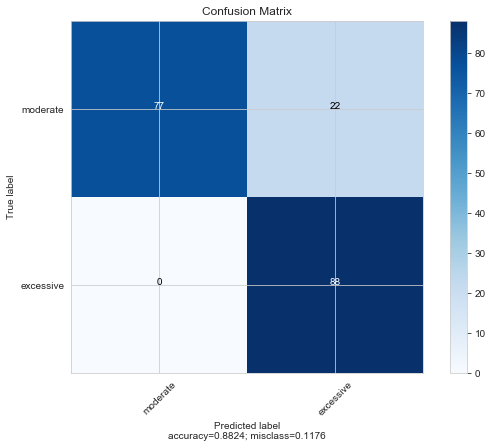

In [84]:
#print(Y_prediction_test.ravel())
#print(testing_y.ravel())
cmatrix = confusion_matrix(testing_y.ravel(), Y_prediction_test.ravel())
print("Confusion matrix of Testing Data:")
print(cmatrix)
plot_confusion_matrix(cmatrix,
    normalize    = False,
    target_names = ['moderate', 'excessive'],
    title        = "Confusion Matrix")

# [[X1 X2][Y1 Y2]] X1 + Y2 Correct Prediction, X2 + Y1 Incorrect Prediction 




In [85]:
print("Classification Report:")
Y_prediction_test = Y_prediction_test.reshape(1, Y_prediction_test.shape[0])
print(classification_report(testing_y, Y_prediction_test))

metrics.f1_score(testing_y, Y_prediction_test, average='weighted', labels=np.unique(Y_prediction_test))



Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       1.00      1.00      1.00         1
         10       0.00      0.00      0.00         0
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


1.0

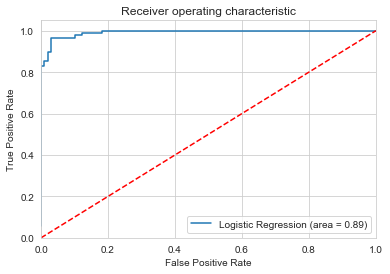

In [86]:
logit_roc_auc = roc_auc_score(testing_y.T, clf.predict(testing_x.T))
fpr, tpr, thresholds = roc_curve(testing_y.T, clf.predict_proba(testing_x.T)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## 4 - Classification of data with one hidden layer Neural Network ##

It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####

Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer
    
### 4.2 - Initialize the model's parameters ####

Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. For Neural Network we always initialize randomly, otherwise if we initialize from 0 we will have symmetry in computation. We can also use Xavier or He initializer.
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.
    
### 4.3 - Forward Propagation ####

**Task**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. 
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

### 4.4 - The cost function

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).


### 4.5 - Backward Propagation

Using the cache computed during forward propagation, you can now implement backward propagation.

**Task**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here is the mathemaical formulea on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

### 4.6 - Update parameters through Gradient Descent

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">

### 4.7 - Integrate parts 4.1 - 4.6 in nn_model() ####

Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

### 4.8 Predictions

Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [87]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))  
    return A

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed() # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,n_y))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Retrieve W1 and W2 from parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),(1 - Y))
    cost = -(1/m)*np.sum(logprobs)
    #cost = (-1/m)*(np.dot(Y,np.log(A2)) + np.dot((1 - Y),np.log(1 - A2))) 
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2= A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

def update_parameters(parameters, grads, learning_rate, costs):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "costs": costs,
                  "learning_rate": learning_rate}
    
    return parameters

def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate = 1, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed()
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs = []
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate, costs)
        
        # Print the cost every 100 training examples
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X,parameters)


    #predictions = (A2 > 0.5)
    # convert probas to 0/1 predictions
    p = np.zeros((1,A2.shape[1]))
    for i in range(0, A2.shape[1]):
        if A2[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p

It is time to run the model and see how it performs on our dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

In [88]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(training_x, training_y, n_h = 5, num_iterations = 10000, learning_rate = 0.01, print_cost=True)

print("Train accuracy: ", compute_accuracy(predict(parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(predict(parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(predict(parameters,testing_x), testing_y))

Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.692881
Cost after iteration 2000: 0.692879
Cost after iteration 3000: 0.692879
Cost after iteration 4000: 0.692879
Cost after iteration 5000: 0.692879
Cost after iteration 6000: 0.692879
Cost after iteration 7000: 0.692879
Cost after iteration 8000: 0.692879
Cost after iteration 9000: 0.692879
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176


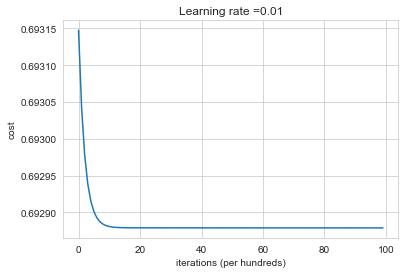

In [89]:
# Plot learning curve (with costs)
costs = np.squeeze(parameters['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(parameters["learning_rate"]))
plt.show()

learning rate is: 0.1
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176
learning rate is: 0.01
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176
learning rate is: 0.001
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176

-------------------------------------------------------



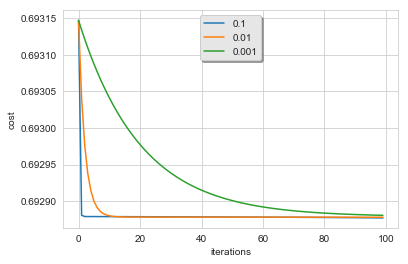

In [90]:
learning_rates = [0.1, 0.01, 0.001] #Above 1 is over shooting for 10000 iterations, even 0.1 is over shooting for 100000
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = nn_model(training_x, training_y, n_h = 5, num_iterations = 10000, learning_rate = i, print_cost=False)
    
    print("Train accuracy: ", compute_accuracy(predict(models[str(i)],training_x), training_y))
    print("Dev accuracy: ", compute_accuracy(predict(models[str(i)],validation_x), validation_y))
    print("Test accuracy: ", compute_accuracy(predict(models[str(i)],testing_x), testing_y))

print ('\n' + "-------------------------------------------------------" + '\n')




for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [91]:
# Rebuild the model with the best possible learning rate
parameters = nn_model(training_x, training_y, n_h = 5, num_iterations = 10000, learning_rate = 0.1, print_cost=True)
print("Train accuracy: ", compute_accuracy(predict(parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(predict(parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(predict(parameters,testing_x), testing_y))

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.692878
Cost after iteration 2000: 0.692878
Cost after iteration 3000: 0.692878
Cost after iteration 4000: 0.692878
Cost after iteration 5000: 0.692878
Cost after iteration 6000: 0.692878
Cost after iteration 7000: 0.692877
Cost after iteration 8000: 0.692877
Cost after iteration 9000: 0.692877
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176


In [92]:
# Predict test/train/dev set examples 
Y_prediction_train = predict(parameters,training_x)
Y_prediction_dev = predict(parameters,validation_x)
Y_prediction_test = predict(parameters,testing_x)

# Print train/test/dev Errors
acc_train = compute_accuracy(Y_prediction_train, training_y)
acc_dev = compute_accuracy(Y_prediction_dev, validation_y)
acc_test = compute_accuracy(Y_prediction_test, testing_y)

acc_data = []
acc_data.append([acc_train, acc_dev, acc_test])
acc_dic['nn_1l_scratch'] = acc_data

print("Train accuracy: ", acc_train)
print("Dev accuracy: ", acc_dev)
print("Test accuracy: ", acc_test)

print(Y_prediction_test)
print(testing_y)
print(Y_prediction_train)
print(training_y)

Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
  1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
  0. 0. 0. 0. 1. 0. 1. 

Confusion matrix of Testing Data:
[[ 0 99]
 [ 0 88]]


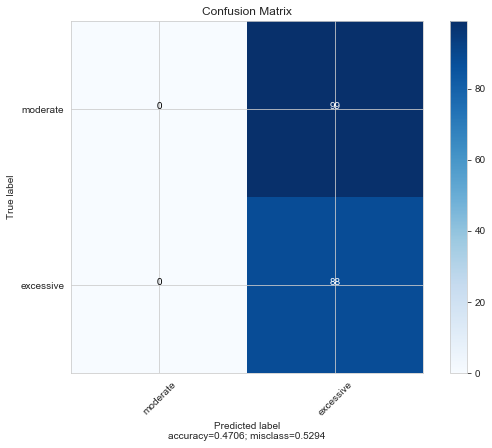

In [93]:
#print(Y_prediction_test.ravel())
#print(testing_y.ravel())
cmatrix = confusion_matrix(testing_y.ravel(), Y_prediction_test.ravel())
print("Confusion matrix of Testing Data:")
print(cmatrix)
plot_confusion_matrix(cmatrix,
    normalize    = False,
    target_names = ['moderate', 'excessive'],
    title        = "Confusion Matrix")

# [[X1 X2][Y1 Y2]] X1 + Y2 Correct Prediction, X2 + Y1 Incorrect Prediction 


In [94]:
print("Classification Report:")
print(classification_report(testing_y, Y_prediction_test))
metrics.f1_score(testing_y, Y_prediction_test, average='weighted', labels=np.unique(Y_prediction_test))

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       1.00      1.00      1.00         1
         10       0.00      0.00      0.00         0
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0

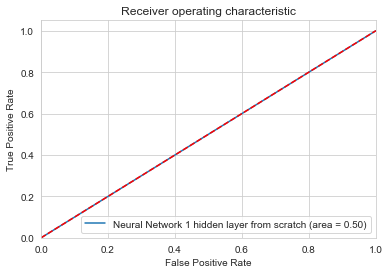

In [95]:
logit_roc_auc = roc_auc_score(testing_y.ravel(), Y_prediction_test.ravel())
fpr, tpr, thresholds = roc_curve(testing_y.ravel(), Y_prediction_test.ravel())
plt.figure()
plt.plot(fpr, tpr, label='Neural Network 1 hidden layer from scratch (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 4.9 - Tuning hidden layer size 

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

In [96]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    parameters = nn_model(training_x, training_y, n_h, num_iterations = 5000)
    predictions = predict(parameters, training_x)
    accuracy = float((np.dot(training_y,predictions.T) + np.dot(1-training_y,1-predictions.T))/float(training_y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 1 hidden units: 55.258467023172905 %
Accuracy for 2 hidden units: 51.15864527629233 %
Accuracy for 3 hidden units: 48.84135472370767 %
Accuracy for 4 hidden units: 55.258467023172905 %
Accuracy for 5 hidden units: 55.258467023172905 %
Accuracy for 20 hidden units: 49.73262032085562 %
Accuracy for 50 hidden units: 49.73262032085562 %


**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

<font color='blue'>
**You've learnt to:**
- Build a complete neural network with a hidden layer
- Make a good use of a non-linear unit
- Implemented forward propagation and backpropagation, and trained a neural network
- See the impact of varying the hidden layer size, including overfitting.

### 4.10 - Compare the performance of our implementation with $sklearn$ library code

We would like to compare our performance with the library code that is already implemented in sklearn.

In [97]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=42,max_iter=10)
n_features = training_x.T.shape[0]
print(clf.fit(training_x.T, training_y.T.reshape(n_features,)))

pred = clf.predict(testing_x.T)
print([pred])

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=10, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [98]:
# Predict test/train/dev set examples 
Y_prediction_train = clf.predict(training_x.T)
Y_prediction_dev = clf.predict(validation_x.T)
Y_prediction_test = clf.predict(testing_x.T)

# Lets perform prediction on train, test and dev sets

acc_train = compute_accuracy(Y_prediction_train, training_y)
acc_dev = compute_accuracy(Y_prediction_dev, validation_y)
acc_test = compute_accuracy(Y_prediction_test, testing_y)

acc_data = []
acc_data.append([acc_train, acc_dev, acc_test])
acc_dic['nn_1l_sklearn'] = acc_data

# Print train/test/dev Errors
print("Train accuracy: ", compute_accuracy(Y_prediction_train, training_y))
print("Dev accuracy: ", compute_accuracy(Y_prediction_dev, validation_y))
print("Test accuracy: ", compute_accuracy(Y_prediction_test, testing_y))

print(Y_prediction_test)
print(testing_y)
print(Y_prediction_train)
print(training_y)

Train accuracy:  48.84135472370767
Dev accuracy:  50.53191489361702
Test accuracy:  52.94117647058824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
  1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
  0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 

Confusion matrix of Testing Data:
[[99  0]
 [88  0]]


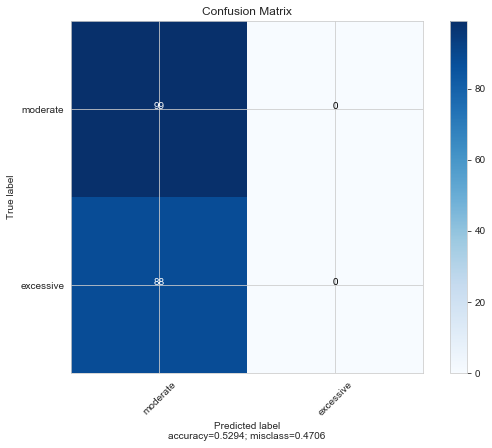

In [99]:
#print(Y_prediction_test.ravel())
#print(testing_y.ravel())
cmatrix = confusion_matrix(testing_y.ravel(), Y_prediction_test.ravel())
print("Confusion matrix of Testing Data:")
print(cmatrix)
plot_confusion_matrix(cmatrix,
    normalize    = False,
    target_names = ['moderate', 'excessive'],
    title        = "Confusion Matrix")

# [[X1 X2][Y1 Y2]] X1 + Y2 Correct Prediction, X2 + Y1 Incorrect Prediction 

In [100]:
print("Classification Report:")
print(Y_prediction_test)
Y_prediction_test = Y_prediction_test.reshape(1, Y_prediction_test.shape[0])
print(classification_report(testing_y, Y_prediction_test))

metrics.f1_score(testing_y, Y_prediction_test, average='weighted', labels=np.unique(Y_prediction_test))

Classification Report:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00   

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.0

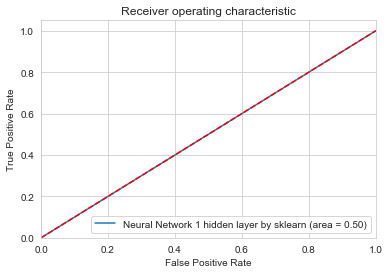

In [101]:
logit_roc_auc = roc_auc_score(testing_y.ravel(), Y_prediction_test.ravel())
fpr, tpr, thresholds = roc_curve(testing_y.ravel(), Y_prediction_test.ravel())
plt.figure()
plt.plot(fpr, tpr, label='Neural Network 1 hidden layer by sklearn (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 5 - A Deep Neural Network Model ##


We have previously trained a 2-layer Neural Network (with one single hidden layer). This week, you will build a deep neural network, with as many layers as you want!

- In this task, you will implement all the functions required to build a deep neural network.
- Then we will use these functions to build a deep neural network for the classification of our dataset.

**After this task you will be able to:**
- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

Let's get started!

To build your neural network, you will be implementing several "helper functions". These helper functions will be used later to build a two-layer neural network and an L-layer neural network. Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this assignment, you will:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network.
- Implement the forward propagation module (shown in purple in the figure below).
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We give you the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
    - Complete the LINEAR part of a layer's backward propagation step.
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters.

<img src="images/final_outline.png" style="width:800px;height:500px;">
<caption><center> **Figure 1**</center></caption><br>


**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps. 

### 5.1 - Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

#### 5.1.1 - 2-layer Neural Network

**Task**: Create and initialize the parameters of the 2-layer neural network.

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- Use random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape.
- Use zero initialization for the biases. Use `np.zeros(shape)`.

#### 5.1.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> **Shape of W** </td> 
        <td> **Shape of b**  </td> 
        <td> **Activation** </td>
        <td> **Shape of Activation** </td> 
    <tr>
    <tr>
        <td> **Layer 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> **Layer 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
    
   <tr>
        <td> **Layer L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>
    
    
   <tr>
        <td> **Layer L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>

</table>

Remember that when we compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Task**: Implement initialization for an L-layer Neural Network. 

**Instructions**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.rand(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for the "Planar Data classification model" from last week would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. Thus means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

### 5.2 - Forward propagation module

#### 5.2.1 - Linear Forward 
Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

**Task**: Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

#### 5.2.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

For more convenience, you are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you will implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.

**Task**: Implement the forward propagation of the *LINEAR->ACTIVATION* layer. Mathematical relation is: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu(). Use linear_forward() and the correct activation function.

#### 5.2.3 L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

<img src="images/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **Figure 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>

**Task**: Implement the forward propagation of the above model.

**Instruction**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 

**Tips**:
- Use the functions you had previously written 
- Use a for loop to replicate [LINEAR->RELU] (L-1) times
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

Great! Now you have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

#### 5.2.4 - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.

**Task**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


### 5.3 - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

**Reminder**: 
<img src="images/backprop_kiank.png" style="width:650px;height:250px;">
<caption><center> **Figure 3** : Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID* <br> *The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.*  </center></caption>

<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

Now, similar to forward propagation, you are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

#### 5.3.1 - Linear backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]} dA^{[l-1]})$.

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **Figure 4** </center></caption>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

#### 5.3.2 - Linear-Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Task**: Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

#### 5.3.3 - L-Model Backward 

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 


<img src="images/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass  </center></caption>

** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

**Task**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

#### 5.3.4 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Task**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 

In [102]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed()
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters     


def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed()
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    #parameters['costs'] = cost
    
    return cost

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

def predict(parameters, X):

    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    #print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p


## 6 - Classification of dataset with Deep Neural Network ##


**After this we will be able to:**
- Build and apply a deep neural network to supervised learning. 

We will build a deep neural network to distinguish two different categories in our data. 

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures.

### 6.1 - 2-layer neural network

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a vector of size $(nfeatures, 1)$.
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be in one category or if it is less than 0.5, then u classify it to the second category. 

### 6.2 - L-layer deep neural network

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a vector of size $(nfeatures, 1)$.
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it in one category and if it is less than 0.5, then in another category.

### 6.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!

## 7 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [103]:
### CONSTANTS DEFINING THE MODEL ####
n_features = training_x.shape[0]
n_x = n_features     # training samples
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 10000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed()
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X,W1,b1,activation="relu")
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2,Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters,grads,learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if  i % 100 == 0:
            costs.append(cost)
            
    d = {}
    d["learning_rate"] = learning_rate
    d["costs"] = costs


    return parameters, d

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. 

No need to run this model, as it is the same as 1 hidden layer. it is called 2 layer NN, because the output layer is also considered as a layer. 

In [104]:
parameters,d = two_layer_model(training_x, training_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.01, num_iterations = 10000, print_cost=True)

print("Train accuracy: ", compute_accuracy(predict(parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(predict(parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(predict(parameters,testing_x), testing_y))

Cost after iteration 0: 0.6931472799357455
Cost after iteration 1000: 0.6928802287243508
Cost after iteration 2000: 0.6928784335934253
Cost after iteration 3000: 0.692878414669342
Cost after iteration 4000: 0.6928784076068121
Cost after iteration 5000: 0.692878400699356
Cost after iteration 6000: 0.692878393705058
Cost after iteration 7000: 0.6928783865892446
Cost after iteration 8000: 0.6928783793514631
Cost after iteration 9000: 0.6928783719666929
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176


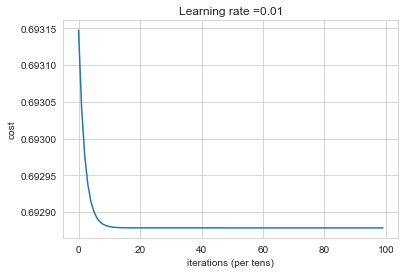

In [105]:

# plot the cost
plt.plot(np.squeeze(d['costs']))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(d['learning_rate']))
plt.show()
        

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [106]:
Y_predictions_train = predict(parameters, training_x)
Y_predictions_dev = predict(parameters, validation_x)
Y_predictions_test = predict(parameters, testing_x)

# Print train/test/dev Errors
acc_train = compute_accuracy(Y_prediction_train, training_y)
acc_dev = compute_accuracy(Y_prediction_dev, validation_y)
acc_test = compute_accuracy(Y_prediction_test, testing_y)

acc_data = []
acc_data.append([acc_train, acc_dev, acc_test])
acc_dic['nn_2l_scratch'] = acc_data

print("Train accuracy: ", acc_train)
print("Dev accuracy: ", acc_dev)
print("Test accuracy: ", acc_test)

print(Y_prediction_test)
print(testing_y)
print(Y_prediction_train)
print(training_y)


Train accuracy:  48.84135472370767
Dev accuracy:  50.53191489361702
Test accuracy:  52.94117647058824
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
  1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
  0. 0. 0. 0. 1. 0. 1. 

Confusion matrix of Testing Data:
[[99  0]
 [88  0]]


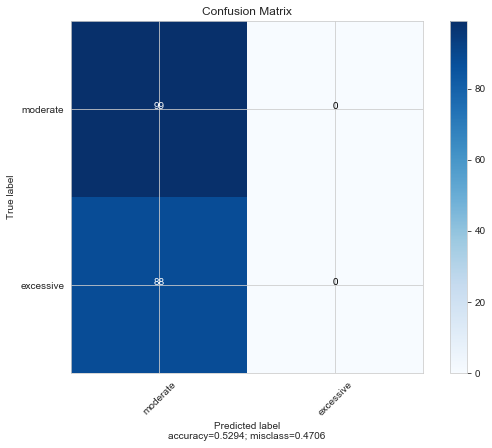

In [107]:
#print(Y_prediction_test.ravel())
#print(testing_y.ravel())
cmatrix = confusion_matrix(testing_y.ravel(), Y_prediction_test.ravel())
print("Confusion matrix of Testing Data:")
print(cmatrix)
plot_confusion_matrix(cmatrix,
    normalize    = False,
    target_names = ['moderate', 'excessive'],
    title        = "Confusion Matrix")

# [[X1 X2][Y1 Y2]] X1 + Y2 Correct Prediction, X2 + Y1 Incorrect Prediction 

In [108]:
print("Classification Report:")
print(classification_report(testing_y, Y_prediction_test))
metrics.f1_score(testing_y, Y_prediction_test, average='weighted', labels=np.unique(Y_prediction_test))

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.0

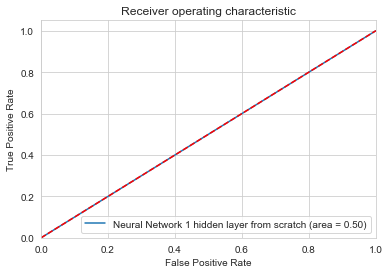

In [109]:
logit_roc_auc = roc_auc_score(testing_y.ravel(), Y_prediction_test.ravel())
fpr, tpr, thresholds = roc_curve(testing_y.ravel(), Y_prediction_test.ravel())
plt.figure()
plt.plot(fpr, tpr, label='Neural Network 1 hidden layer from scratch (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 8 - L-layer Neural Network for classification

Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layer_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [110]:
### CONSTANTS ###
layers_dims = [n_features, 20, 7, 5, 1] #  5-layer model

# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed()
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        ### END CODE HERE ###
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    d = {}
    d['learning_rate'] = learning_rate
    d['costs'] = np.squeeze(costs)
    
    return parameters, d

You will now train the model as a 5-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration.

In [111]:
parameters, d = L_layer_model(training_x, training_y, layers_dims, learning_rate = 0.01, num_iterations = 10000, print_cost = True)
print("Train accuracy: ", compute_accuracy(predict(parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(predict(parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(predict(parameters,testing_x), testing_y))

Cost after iteration 0: 0.693069
Cost after iteration 1000: 0.692457
Cost after iteration 2000: 0.692436
Cost after iteration 3000: 0.692415
Cost after iteration 4000: 0.692393
Cost after iteration 5000: 0.692370
Cost after iteration 6000: 0.692346
Cost after iteration 7000: 0.692320
Cost after iteration 8000: 0.692293
Cost after iteration 9000: 0.692265
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176


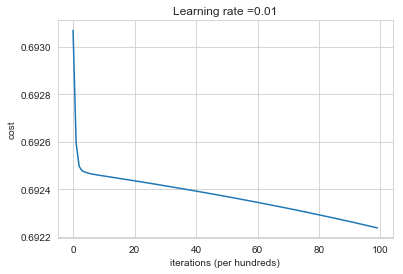

In [112]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


learning rate is: 0.1
Train accuracy:  55.258467023172905
Dev accuracy:  54.78723404255319
Test accuracy:  50.80213903743315

-------------------------------------------------------

learning rate is: 0.01
Train accuracy:  51.15864527629233
Dev accuracy:  51.59574468085106
Test accuracy:  50.80213903743315

-------------------------------------------------------

learning rate is: 0.001
Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176

-------------------------------------------------------



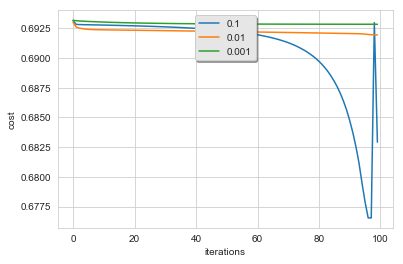

In [113]:
learning_rates = [0.1, 0.01, 0.001] # 1 and 0.1 is overshooting
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)], d[str(i)] = L_layer_model(training_x, training_y, layers_dims, learning_rate = i, num_iterations = 10000, print_cost = False)
    print("Train accuracy: ", compute_accuracy(predict(models[str(i)],training_x), training_y))
    print("Dev accuracy: ", compute_accuracy(predict(models[str(i)],validation_x), validation_y))
    print("Test accuracy: ", compute_accuracy(predict(models[str(i)],testing_x), testing_y))
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(d[str(i)]["costs"]), label= str(d[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [127]:
parameters, d = L_layer_model(training_x, training_y, layers_dims, learning_rate = 0.1, num_iterations = 100000, print_cost = True)
print("Train accuracy: ", compute_accuracy(predict(parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(predict(parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(predict(parameters,testing_x), testing_y))

Cost after iteration 0: 0.693164
Cost after iteration 1000: 0.692811
Cost after iteration 2000: 0.692795
Cost after iteration 3000: 0.692774
Cost after iteration 4000: 0.692747
Cost after iteration 5000: 0.692712
Cost after iteration 6000: 0.692665
Cost after iteration 7000: 0.692599
Cost after iteration 8000: 0.692504
Cost after iteration 9000: 0.692360
Cost after iteration 10000: 0.692128
Cost after iteration 11000: 0.691717
Cost after iteration 12000: 0.690900
Cost after iteration 13000: 0.688852
Cost after iteration 14000: 0.681861
Cost after iteration 15000: 0.712798
Cost after iteration 16000: 0.680977
Cost after iteration 17000: 0.665901
Cost after iteration 18000: 0.674752
Cost after iteration 19000: 0.658801
Cost after iteration 20000: 0.654456
Cost after iteration 21000: 0.653617
Cost after iteration 22000: 0.671213
Cost after iteration 23000: 0.644704
Cost after iteration 24000: 0.647254
Cost after iteration 25000: 0.641987
Cost after iteration 26000: 0.646606
Cost after ite

In [143]:
Y_predictions_train = predict(parameters, training_x)
Y_predictions_dev = predict(parameters, validation_x)
Y_predictions_test = predict(parameters, testing_x)

# Print train/test/dev Errors
acc_train = compute_accuracy(Y_prediction_train, training_y)
acc_dev = compute_accuracy(Y_prediction_dev, validation_y)
acc_test = compute_accuracy(Y_prediction_test, testing_y)

acc_data = []
acc_data.append([acc_train, acc_dev, acc_test])
acc_dic['dnn_ll_scratch'] = acc_data

print("Train accuracy: ", acc_train)
print("Dev accuracy: ", acc_dev)
print("Test accuracy: ",acc_test)

print(Y_prediction_test)
print(testing_y)
print(Y_prediction_train)
print(training_y)


Train accuracy:  51.15864527629233
Dev accuracy:  49.46808510638297
Test accuracy:  47.05882352941176
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
  1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
  0. 0. 0. 0. 1. 0. 1. 

Confusion matrix of Testing Data:
[[ 0 99]
 [ 0 88]]


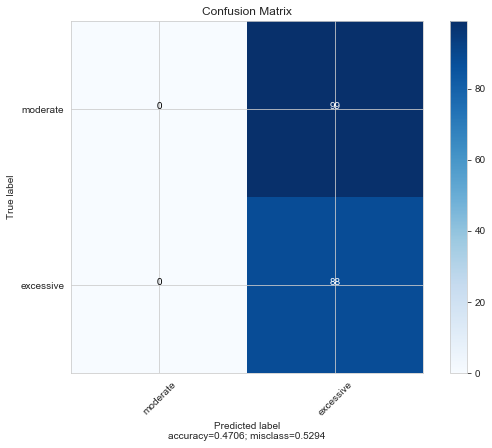

In [129]:
#print(Y_prediction_test.ravel())
#print(testing_y.ravel())
cmatrix = confusion_matrix(testing_y.ravel(), Y_prediction_test.ravel())
print("Confusion matrix of Testing Data:")
print(cmatrix)
plot_confusion_matrix(cmatrix,
    normalize    = False,
    target_names = ['moderate', 'excessive'],
    title        = "Confusion Matrix")

# [[X1 X2][Y1 Y2]] X1 + Y2 Correct Prediction, X2 + Y1 Incorrect Prediction 

In [130]:
print("Classification Report:")
print(classification_report(testing_y, Y_prediction_test))

metrics.f1_score(testing_y, Y_prediction_test, average='weighted', labels=np.unique(Y_prediction_test))

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       1.00      1.00      1.00         1
         10       0.00      0.00      0.00         0
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0

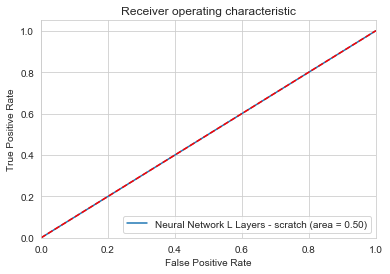

In [131]:
logit_roc_auc = roc_auc_score(testing_y.ravel(), Y_prediction_test.ravel())
fpr, tpr, thresholds = roc_curve(testing_y.ravel(), Y_prediction_test.ravel())
plt.figure()
plt.plot(fpr, tpr, label='Neural Network L Layers - scratch (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 9 - Compare the performance of our implementation with $sklearn$ library code

We would like to compare our performance with the library code that is already implemented in sklearn.

In [132]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
print(clf.fit(training_x.T, training_y.T))

print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

print("Training set score: %f" % clf.score(training_x.T, training_y.T))
print("Test set score: %f" % clf.score(training_x.T, training_y.T))
clf.classes_

result = clf.predict(testing_x.T)
print(result)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
weights between input and first hidden layer:
[[-0.07972266  0.21168088 -0.48027447 -0.18991268 -0.33938589]
 [-0.39166832 -0.30143137 -0.14838042 -0.09918258  0.0372939 ]
 [-0.07763538  0.1779531  -0.28395303  0.3632834  -0.45407121]
 [ 0.16377985 -0.07945096  0.05638735 -0.34550498 -0.29005464]
 [ 0.28894597  0.44989107 -0.17925621  0.18477755  0.36162292]
 [ 0.37912574 -0.39867654 -0.44286174 -0.3172166   0.36330749]
 [-0.38589579 -0.07579733  0.43992593  0.03186417  0.18434953]
 [-0.17724681  0.17918426  0.32149788 -0.46281355  0.24033083]
 [ 0.46968244  0.23

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
Y_prediction_train = clf.predict(training_x.T)
Y_prediction_dev = clf.predict(validation_x.T)
Y_prediction_test = clf.predict(testing_x.T)

# Print train/test/dev Errors
acc_train = compute_accuracy(Y_prediction_train, training_y)
acc_dev = compute_accuracy(Y_prediction_dev, validation_y)
acc_test = compute_accuracy(Y_prediction_test, testing_y)

print(acc_dic)
acc_data = []
acc_data.append([acc_train, acc_dev, acc_test])
acc_dic['dnn_ll_sklearn'] = acc_data

print("Train accuracy: ", acc_train)
print("Validation accuracy: ", acc_dev)
print("Test accuracy: ",acc_test)

print(Y_prediction_test)
print(testing_y)
print(Y_prediction_train)
print(training_y)

{'lr_scratch': [[86.98752228163993, 77.12765957446808, 80.74866310160428]], 'lr_sklearn': [[95.90017825311944, 86.17021276595744, 88.23529411764706]], 'nn_1l_scratch': [[51.15864527629233, 49.46808510638297, 47.05882352941176]], 'nn_1l_sklearn': [[48.84135472370767, 50.53191489361702, 52.94117647058824]], 'nn_2l_scratch': [[48.84135472370767, 50.53191489361702, 52.94117647058824]], 'dnn_ll_scratch': [[48.84135472370767, 50.53191489361702, 52.94117647058824]]}
Train accuracy:  51.15864527629233
Validation accuracy:  49.46808510638297
Test accuracy:  47.05882352941176
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

Confusion matrix of Testing Data:
[[ 0 99]
 [ 0 88]]


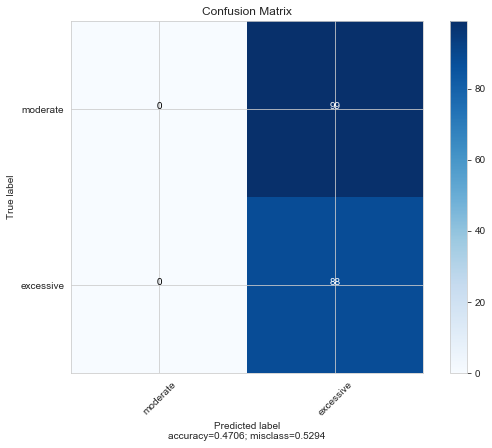

In [133]:
#print(Y_prediction_test.ravel())
#print(testing_y.ravel())
cmatrix = confusion_matrix(testing_y.ravel(), Y_prediction_test.ravel())
print("Confusion matrix of Testing Data:")
print(cmatrix)
plot_confusion_matrix(cmatrix,
    normalize    = False,
    target_names = ['moderate', 'excessive'],
    title        = "Confusion Matrix")

# [[X1 X2][Y1 Y2]] X1 + Y2 Correct Prediction, X2 + Y1 Incorrect Prediction 

In [135]:
print("Classification Report:")
print(testing_y.shape)
print(Y_prediction_test.shape)
#Y_prediction_test = Y_prediction_test.reshape(1,Y_prediction_test.shape[0])
print(classification_report(testing_y, Y_prediction_test))

metrics.f1_score(testing_y, Y_prediction_test, average='weighted', labels=np.unique(Y_prediction_test))

Classification Report:
(1, 187)
(1, 187)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       1.00      1.00      1.00         1
         10       0.00      0.00      0.00         0
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
    

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0

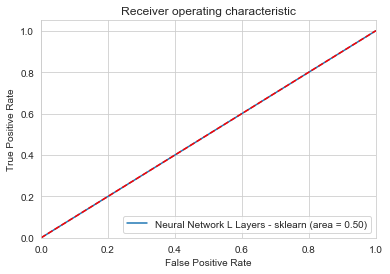

In [136]:
logit_roc_auc = roc_auc_score(testing_y.ravel(), Y_prediction_test.ravel())
fpr, tpr, thresholds = roc_curve(testing_y.ravel(), Y_prediction_test.ravel())
plt.figure()
plt.plot(fpr, tpr, label='Neural Network L Layers - sklearn (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [144]:
modelsNames = ['lr_scratch','lr_sklearn','nn_1l_scratch', 'nn_1l_sklearn', 'nn_2l_scratch', 'dnn_ll_scratch', 'dnn_ll_sklearn']

acc_data = []
acc_data = np.array([acc_dic[i] for i in modelsNames])
print(acc_data)
print(acc_data.reshape(7,3))
acc_data = acc_data.reshape(7,3)
for i in modelsNames:
    print(i, acc_dic[i])



[[[86.98752228 77.12765957 80.7486631 ]]

 [[95.90017825 86.17021277 88.23529412]]

 [[51.15864528 49.46808511 47.05882353]]

 [[48.84135472 50.53191489 52.94117647]]

 [[48.84135472 50.53191489 52.94117647]]

 [[51.15864528 49.46808511 47.05882353]]

 [[51.15864528 49.46808511 47.05882353]]]
[[86.98752228 77.12765957 80.7486631 ]
 [95.90017825 86.17021277 88.23529412]
 [51.15864528 49.46808511 47.05882353]
 [48.84135472 50.53191489 52.94117647]
 [48.84135472 50.53191489 52.94117647]
 [51.15864528 49.46808511 47.05882353]
 [51.15864528 49.46808511 47.05882353]]
lr_scratch [[86.98752228163993, 77.12765957446808, 80.74866310160428]]
lr_sklearn [[95.90017825311944, 86.17021276595744, 88.23529411764706]]
nn_1l_scratch [[51.15864527629233, 49.46808510638297, 47.05882352941176]]
nn_1l_sklearn [[48.84135472370767, 50.53191489361702, 52.94117647058824]]
nn_2l_scratch [[48.84135472370767, 50.53191489361702, 52.94117647058824]]
dnn_ll_scratch [[51.15864527629233, 49.46808510638297, 47.0588235294

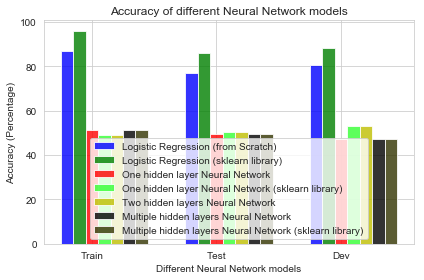

In [141]:
# data to plot
n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

print()
rects1 = plt.bar(index, acc_data[0][0:], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Logistic Regression (from Scratch)')
 
rects2 = plt.bar(index + bar_width, acc_data[1][0:], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Logistic Regression (sklearn library)')

rects3 = plt.bar(index + bar_width + bar_width, acc_data[2][0:], bar_width,
                 alpha=opacity,
                 color='r',
                 label='One hidden layer Neural Network')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, acc_data[3][0:], bar_width,
                 alpha=opacity,
                 color='#34FF33',
                 label='One hidden layer Neural Network (sklearn library)')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, acc_data[4][0:], bar_width,
                 alpha=opacity,
                 color='y',
                 label='Two hidden layers Neural Network')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, acc_data[5][0:], bar_width,
                 alpha=opacity,
                 color='black',
                 label='Multiple hidden layers Neural Network')

rects7 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, acc_data[6][0:], bar_width,
                 alpha=opacity,
                 color='#323300',
                 label='Multiple hidden layers Neural Network (sklearn library)')

plt.xlabel('Different Neural Network models')
plt.ylabel('Accuracy (Percentage)')
plt.title('Accuracy of different Neural Network models')
plt.xticks(index + 2 * bar_width, ('Train', 'Test', 'Dev'))
plt.legend(loc='lower center')
 
plt.tight_layout()
plt.show()


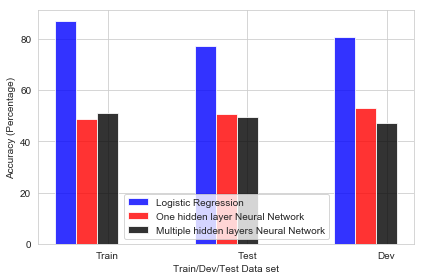

In [142]:
# data to plot
n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

print()
rects1 = plt.bar(index, acc_data[0][0:], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Logistic Regression')
 
rects2 = plt.bar(index + bar_width, acc_data[3][0:], bar_width,
                 alpha=opacity,
                 color='r',
                 label='One hidden layer Neural Network')

rects3 = plt.bar(index + bar_width + bar_width, acc_data[5][0:], bar_width,
                 alpha=opacity,
                 color='black',
                 label='Multiple hidden layers Neural Network')

plt.xlabel('Train/Dev/Test Data set')
plt.ylabel('Accuracy (Percentage)')
#plt.title('Accuracy of different Neural Network models')
plt.xticks(index + 2 * bar_width, ('Train', 'Test', 'Dev'))
plt.legend(loc='lower center')
 
plt.tight_layout()
plt.show()

### 9 -Implementation of Deep Neural Network in Tensorflow

TODO

### 10 - Conclusion

TODO